In [1]:
import pandas as pd

df = pd.read_csv('../0815/taipei_tripadvisor_top500.csv')
df.head(2)

,title,paiming,uri,lat,lng,recommend_price,hotel_address,hotel_star,hotel_city,hotel_section,price_range,avg_rating,comment_count,offical_img_uri,facility,room,agoda_price
0,台北凱達大飯店,"台北排名第 1 的超值住宿地點，共 1,200 家",https://www.tripadvisor.com.tw/Hotel_Review-g1...,25.044006,121.507751,"NT$2,776",艋舺大道167號,4.0,台北,萬華,"NT$2,861 - NT$6,444",4.0,336.0,https://media-cdn.tripadvisor.com/media/photo-...,"禁菸客房, 套房, 家庭房, 空調設施, 客房服務, 冰箱","免費高速上網 (WiFi), 游泳池, 有健身房的健身中心, 酒吧/酒廊, 機場接送, 提供...","NT$2,667"
1,新驛旅店 - 復興北路店,"台北排名第 2 的超值住宿地點，共 1,200 家",https://www.tripadvisor.com.tw/Hotel_Review-g1...,25.033276,121.499519,"NT$1,960",中山區復興北路338號,3.5,台北,中山區,"NT$2,326 - NT$4,401",5.0,919.0,https://media-cdn.tripadvisor.com/media/photo-...,"禁菸客房, 套房, 家庭房, 空調設施, 保險箱, 冰箱, 平板電視","免費停車, 停車, 免費高速上網 (WiFi), 機場接送, 提供上網服務的商務中心, 禁菸...",NaN


In [14]:
# 縣市是台北的有幾間
df.loc[df['hotel_city'] == '台北'].shape

(655, 17)

In [17]:
# 各區有幾間
df['hotel_section'].value_counts()

中山區         151
中正區         109
萬華          104
大同           62
大安           55
松山           42
北投           41
信義區          32
士林           27
南港           13
內湖           10
文山            4
台北的特色住宿       2
台北的客棧和民宿      2
台北飯店          1
Name: hotel_section, dtype: int64

(array([255., 109.,  96.,  62.,  13.,  74.,  10.,  31.,   2.,   3.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

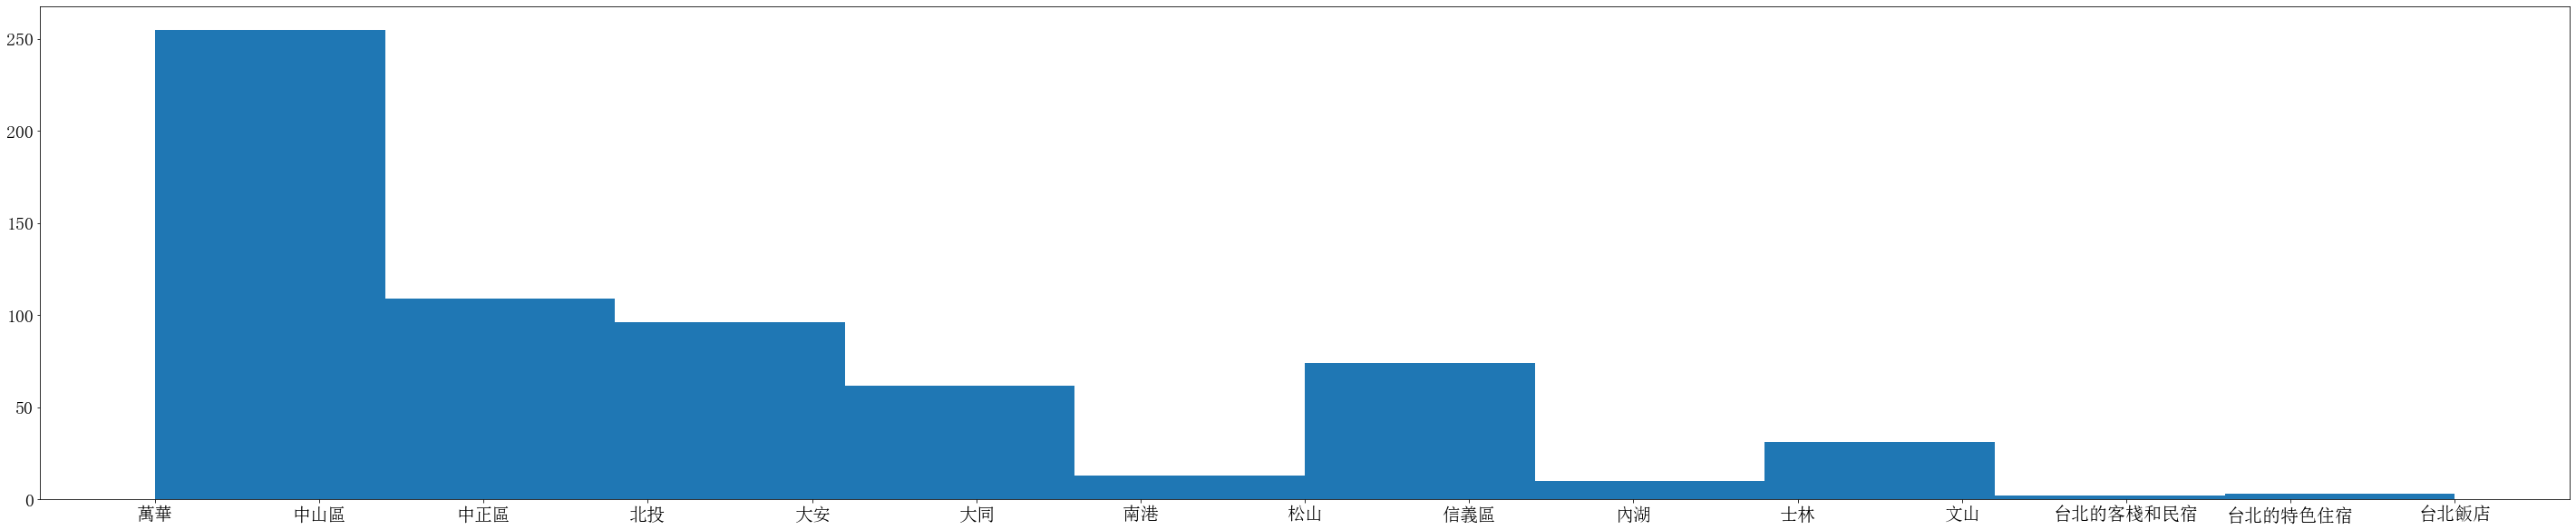

In [31]:
plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(50,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['hotel_section'])

In [ ]:
# df['lat'].dropna(inplace=True)
# df['lng'].dropna(inplace=True)

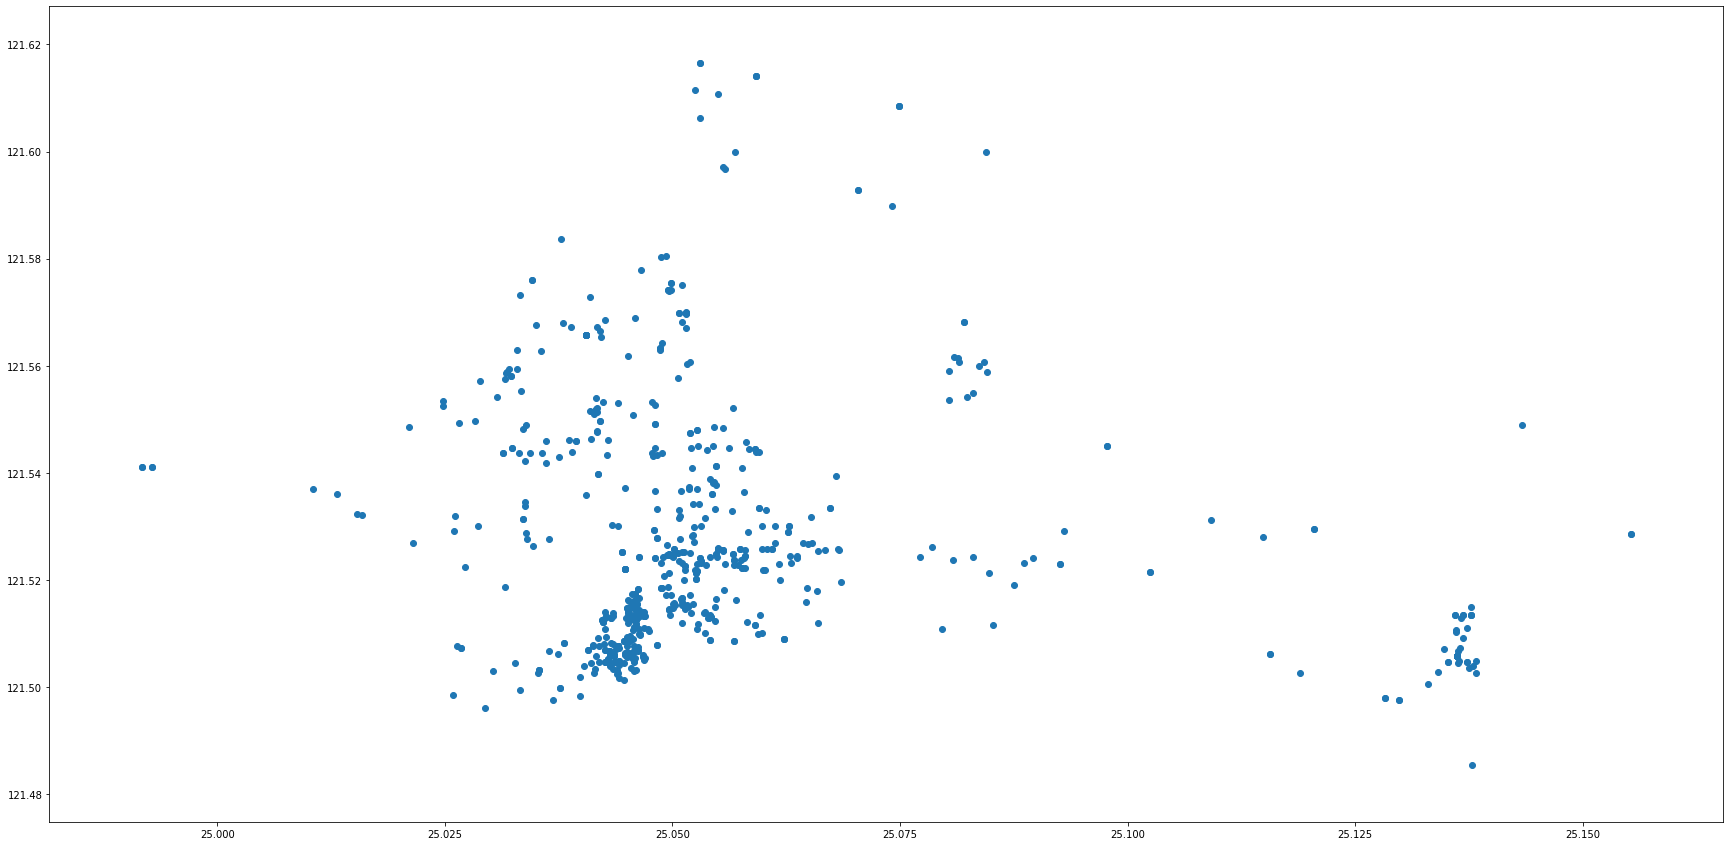

In [5]:
plt.figure(figsize=(30,15))
plt.scatter(df['lat'], df['lng'])

要用plotly記得裝

如果用pipenv記得前面要加上`pipenv run`

> jupyter labextension install @jupyterlab/plotly-extension

其他問題可以參考:
> https://stackoverflow.com/questions/54936125/plotly-gives-an-empty-field-as-output-in-jupyter-lab

> https://stackoverflow.com/questions/48560138/plotly-offline-iplot-gives-a-large-blank-field-as-its-output-in-jupyter-notebook?noredirect=1&lq=1

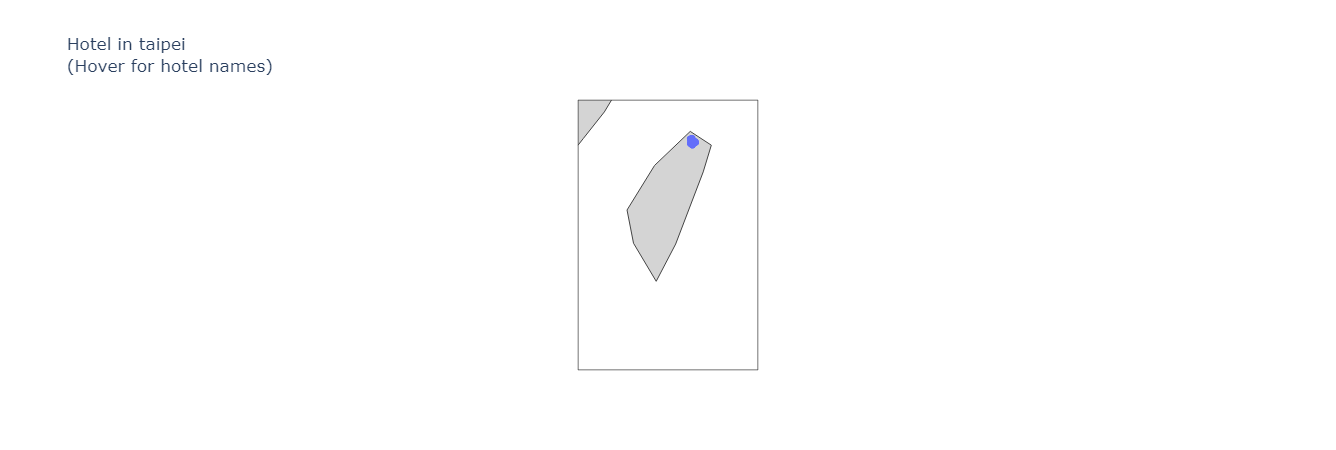

In [8]:
import plotly.graph_objects as go
# jupyter設定
from plotly.offline import iplot, init_notebook_mode, plot
# init_notebook_mode(connected=True)

fig = go.Figure(data=go.Scattergeo(
        lon = df['lng'],
        lat = df['lat'],
        text = df['title'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Hotel in taipei<br>(Hover for hotel names)',
        geo = dict(
            showland = True,
            landcolor = "rgb(212, 212, 212)",
            lonaxis = dict(
                range= [ 119, 123],
            ),
        lataxis = dict (
                range= [ 20, 26],
            )
        )
    )

# iplot(fig)

fig.show()

### 進階畫法

In [ ]:
import configparser
config = configparser.ConfigParser()
config.read('Config.ini')
mapbox_token = config.get('token', 'mapbox')

In [13]:
# 存成html
plot(fig, filename='taipei-hotel-map.html')

'taipei-hotel-map.html'

### check NA

In [3]:
df.isnull().sum()

title                0
paiming              0
uri                  0
lat                179
lng                179
recommend_price    232
hotel_address        0
hotel_star          92
hotel_city           0
hotel_section        0
price_range        134
avg_rating         188
comment_count      188
offical_img_uri    188
facility           304
room               486
agoda_price        657
dtype: int64

#### 去掉沒有評論的
> https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving

In [3]:
df = df[df.avg_rating.notnull()]
df.isnull().sum()

title                0
paiming              0
uri                  0
lat                 62
lng                 62
recommend_price     87
hotel_address        0
hotel_star          54
hotel_city           0
hotel_section        0
price_range          0
avg_rating           0
comment_count        0
offical_img_uri      0
facility           155
room               337
agoda_price        475
dtype: int64

#### 評分分佈

(array([  3.,   4.,   3.,  17.,   0.,  65., 131., 236., 194.,  56.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

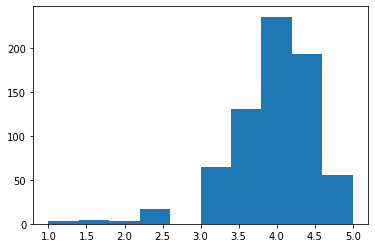

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df['avg_rating'])

#### 評論數量分佈

(array([552.,  52.,  22.,  12.,   7.,   2.,   2.,   3.,   1.,   2.]),
 array([1.0000e+00, 4.2420e+02, 8.4740e+02, 1.2706e+03, 1.6938e+03,
        2.1170e+03, 2.5402e+03, 2.9634e+03, 3.3866e+03, 3.8098e+03,
        4.2330e+03]),
 <a list of 10 Patch objects>)

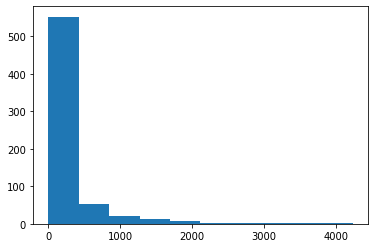

In [11]:
plt.hist(df['comment_count'])

#### 價格與index走勢

In [6]:
df['recommend_price'].dropna(inplace=True)
df['recommend_price'] = df['recommend_price'].str.replace('NT\$', '').str.replace('\,', '').astype('int')

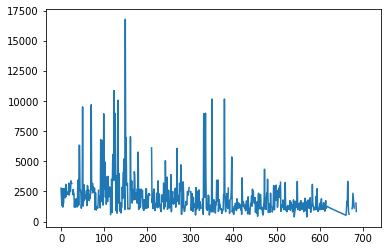

In [7]:
# x軸是index
plt.plot(df['recommend_price'])

#### 價格分佈

c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([409., 168.,  22.,   9.,   3.,   9.,   1.,   0.,   0.,   1.]),
 array([  390.,  2031.,  3672.,  5313.,  6954.,  8595., 10236., 11877.,
        13518., 15159., 16800.]),
 <a list of 10 Patch objects>)

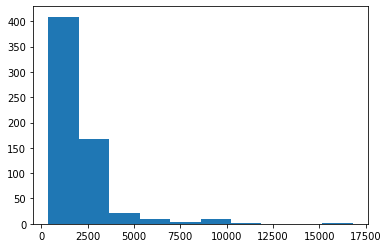

In [8]:
plt.hist(df['recommend_price'])

### 去掉沒有星等的

In [9]:
df = df[df.hotel_star.notnull()]
df.isnull().sum()

title                0
paiming              0
uri                  0
lat                 40
lng                 40
recommend_price     64
hotel_address        0
hotel_star           0
hotel_city           0
hotel_section        0
price_range          0
avg_rating           0
comment_count        0
offical_img_uri      0
facility           124
room               301
agoda_price        426
dtype: int64

(array([  4.,   1.,  75.,  75.,   0., 235., 153.,  66.,  37.,   9.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

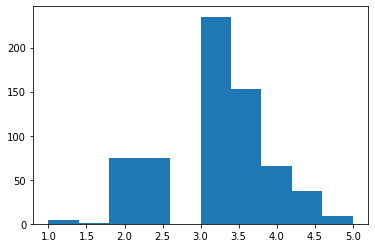

In [10]:
plt.hist(df['hotel_star'])